# NFL Birthday Analysis (ANOVA)
I am currently in the SMU Masters Data Science Program and we discussing a topic on observational vs experimental studies, and one of the studies we were analyzing was the study performed on the __relative age effect in athletics__. [Brewer, L. M., and Cochran, J. J.(June 2013), "August’s Child Is...Favoured by Fortune."](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2013.00661.x) Per Lauren M. Bre and James J. Cochran study:

![](https://cdn-s3.si.com/s3fs-public/styles/marquee_large_2x/public/2015/01/13/terrell-owens-popcorn-celebration.jpg?itok=GAAYT_9R)

We will be working to determine if there is a significant difference between two groups. The two groups we will be looking at are NFL players birthdays January - April and those birthday May-December to see if there are differences in the two populations. 


### ANOVA Assumptions

Specifically for a one-way ANOVA (analysis of variance) we often look at testing the asusmption to confirm the validity of the test to prevent the result and our interpetation from being misleading. These assumptions are as follows:
1. Assumption of normality (e.g., are the errors nornmally distributed?) 
2. Equal Variance (e.g., is the error variance between the groups consistant?)
3. Independence (most important) (e.g., are the errors independent)

On the event that the above three distributions are violated, we will have to consider another test such as a non-parametric test or a permutation test. 

### Data Used
The data used was came from https://www.pro-football-reference.com/ and in a scripted i used to pull the NFL players birthdays. This data set contains the NFL players names, position, year of birth, years they were in the NFL, birth month and other career statistitics. We will only use the the birth month for each player and birth year we will define a starting point where the relative age effect in athletics could have occured given the american education system. 

Below we import the required libraries and take a peak at the data.

In [10]:
import pandas as pd
import numpy as np
from scipy import stats

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

In [22]:
bday = pd.read_csv('nfl_birthdays.csv', index_col=0)
bday = bday.reset_index(drop=False)
bday = bday[(bday.born >= 1980)] # who played at least 7 games
bday = bday[['born', 'month', 'games', 'player' ,'position']]
bday.head()

,born,month,games,player,position
4,1989,1,26.0,Marvin Austin,DL
5,1984,1,3.0,Johnny Baldwin,LB
6,1986,1,29.0,Ramses Barden,WR
7,1988,1,98.0,Joe Barksdale,OL
19,1988,1,3.0,Zach Clayton,DT


## Descriptive Statistics

Distribtuion of birthday months by 5 yearh incements for those born after 1980.

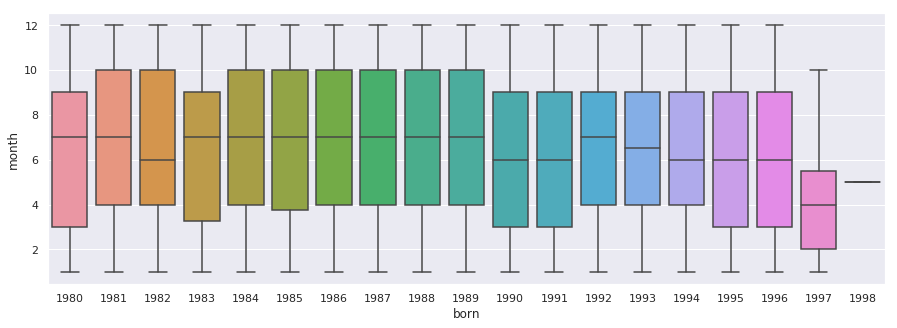

In [23]:
# create box chart and plot players birth month disctribution arcross year
plt.figure(figsize=(15,5))
sns.boxplot(x="born", y="month", data=bday)   

plt.show()
plt.clf()
plt.close()

__Analysis:__ In the above box plots we can see the the sample values plotted against the means which appears to be similar lenght. Because the way we collected the data there can only be values between 1 (January) and 12 (December) therefore, for obvious reasons, we will not identify any outliers. 

The __homogeneity of variance__ appears to be quite consistant among the other populations.

Next is a plot of QB's that have played more than 25 games born after then 1980s:


/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac312889e8>,
      dtype=object)

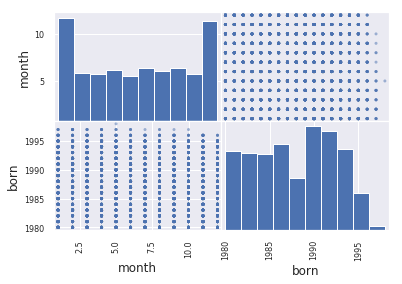

In [24]:
from pandas.tools import plotting
plotting.scatter_matrix(bday[['month', 'born']])

looks for the QBs born after 1980 that played more than 100 games often are born in early winter or late spring. 

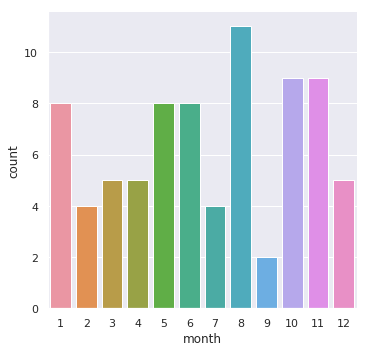

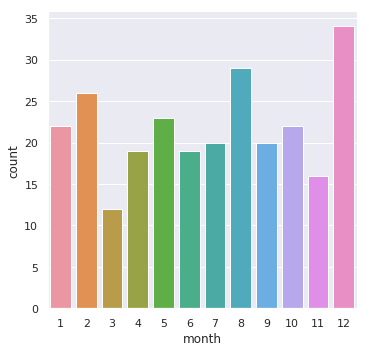

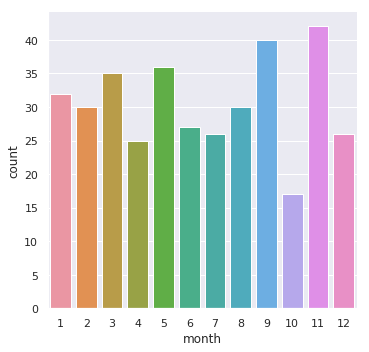

In [25]:
sns.catplot(x="month", kind="count", 
            data=bday[(bday.games > 25) & (bday.position == 'QB')])

sns.catplot(x="month", kind="count", 
            data=bday[(bday.games > 25) & (bday.position == 'RB')])
sns.catplot(x="month", kind="count", 
            data=bday[(bday.games > 25) & (bday.position == 'WR')])

In [26]:
stats.chisquare(bday[(bday.games > 100) & (bday.position == 'QB')]['month'])

Power_divergenceResult(statistic=37.126213592233015, pvalue=0.0020129511557639944)

In [27]:
month_ = bday.groupby(by = "month", as_index=False)['player'].count()
month_

,month,player
0,1,576
1,2,525
2,3,512
3,4,503
4,5,547
5,6,484
6,7,564
7,8,536
8,9,569
9,10,506


#### Groups/Factors Selection (selecting the independent variables)
Next we will indicate what the groups we want to test to see (1) if there is a difference among the groups and (2) which group in fact is carrying the most difference. Therefore we will have 3 different groups:
1. `q1` for NFL players born between Jan and April
2. `q2` for NFL players born between May and August
3. `q3` for NFL players born between September and December

In [30]:
bday.loc[bday.month <=4, "month_indicator"] = 'q1'
bday.loc[(bday.month >4) & (bday.month <=8), "month_indicator"] = 'q2'
bday.loc[(bday.month >8), "month_indicator"] = 'q3'
#bday.loc[bday.month > 4, "month_indicator"] = 'other'

q1 = bday[bday.month_indicator == 'q1']['month']
q2 = bday[bday.month_indicator == 'q2']['month']
q3 = bday[bday.month_indicator == 'q3']['month']
#other = bday[bday.month_indicator == 'other']['month']

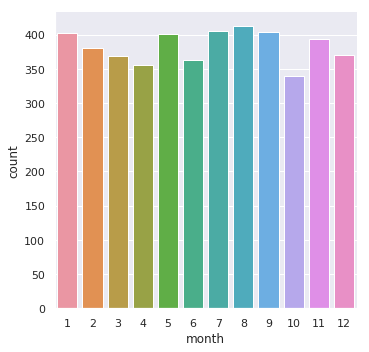

In [31]:
sns.catplot(x="month", kind="count", data=bday[bday.games > 7])

### ANOVA Check
We will perfomr an anova test using the `f_oneway()` function in `scipy`. We will use the `q1` for birthdays from Jan-April and `other` for birthdays 

#### Hypothesis

$H_0:μ_q=μ_2=μ_3$
   
Therefore rejecthing the $H_0$ means that there is a significant difference between at least two of the archer, therefore we define our alternative hypothsis as:

$H_A$: at least two means are significantly different

In [32]:
# https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/

## ANOVA Test 
from scipy.stats import f_oneway 

stat, p = f_oneway(q1, q2, q3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=27012.161, p=0.000
Different distributions (reject H0)


Per the results running the ANOVA test, we can interpret the p-value correctly rejecting the nully hypotehsis indicating the one or more sample means differ. Therefore we can move on to performing a post hoc test

In [33]:
## import library
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [34]:
mc = MultiComparison(bday.month, bday.month_indicator)
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  q1     q2    4.0658  3.9848 4.1469  True 
  q1     q3    8.0328  7.9518 8.1139  True 
  q2     q3    3.967   3.8861 4.0479  True 
-------------------------------------------
['q1' 'q2' 'q3']


The output of the Tukey test shows the average differences, a confidence interval as well as whether we would reject the null hyptoehsis for each pair of groups at the given significance level. 

We can see from the tukey test that `other` is significantly diddfferent from the other measures. 

group1,group2,meandiff,lower,upper,reject
q1,q2,4.0658,3.9848,4.1469,True
q1,q3,8.0328,7.9518,8.1139,True
q2,q3,3.967,3.8861,4.0479,True


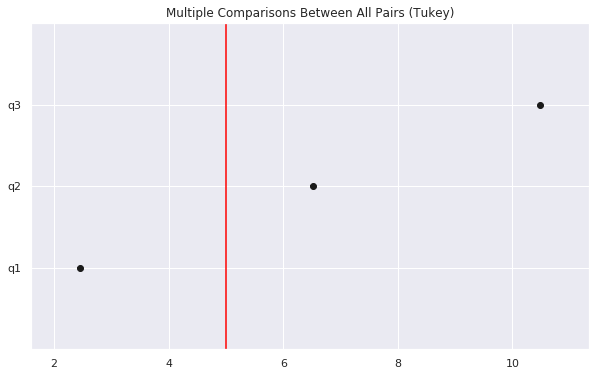

In [35]:
tukey = pairwise_tukeyhsd(endog=bday['month'],     # Data
                          groups=bday.month_indicator,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=5,ymin=-1,ymax=4.5, color="red")

tukey.summary()              # See test summary

We can conlcude with 95% confidence that only group that is likely to overlap with Q1 is Q2. 